In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585


## 
## Ice selection

In [14]:
files=glob.glob("Data/siconc_*_ice_region.nc")
files

['Data/siconc_CMCC-ESM2_ice_region.nc',
 'Data/siconc_IPSL-CM6A-LR_ice_region.nc']

In [16]:
ice = nct.open_data(files)
ice

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                       variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                              
Data/siconc_CMCC-ESM2_ice_region.nc      siconc   None    32400        1      None  None       F32
Data/siconc_IPSL-CM6A-LR_ice_region.nc   siconc   None    32400        1      None  None       F32

In [17]:
ice.ensemble_mean()
ice.to_nc("Data/siconc_Multimodel_ice_region.nc")

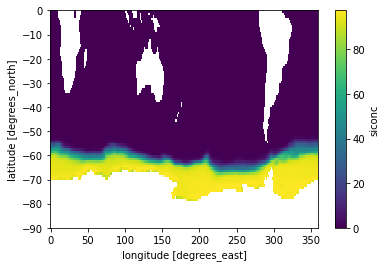

In [18]:
nc = xarray.open_dataset("Data/siconc_Multimodel_ice_region.nc")
nc["siconc"].plot()

## 
## epc100

In [6]:
variable = "epc100"
print(variable)

epc100


In [9]:
files=glob.glob("Data/{}_*_percentage_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc']

In [6]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                    variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                           
Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32

In [10]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))

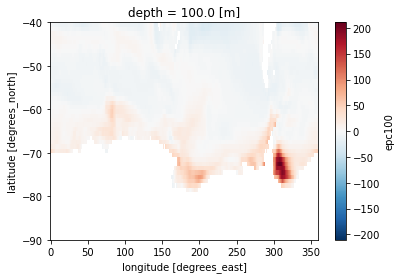

In [12]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))
nc[variable].plot()

In [13]:
files=glob.glob("Data/{}_*_absolute_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_absolute_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_absolute_whole.nc']

In [14]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                  variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                         
Data/epc100_CMCC-ESM2_ssp585_absolute_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_absolute_whole.nc   epc100   None    18000        1      None  None       F32

In [15]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment))

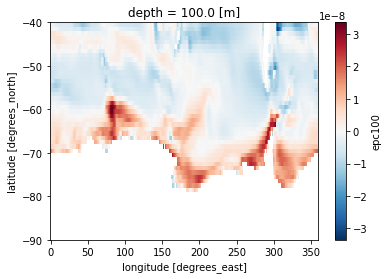

In [16]:
nc = xarray.open_dataset("Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment))
nc[variable].plot()

In [7]:
files=glob.glob("Data/{}_*_historical_20yr_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_historical_20yr_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_historical_20yr_whole.nc']

In [10]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                  variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                         
Data/epc100_CMCC-ESM2_historical_20yr_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_historical_20yr_whole.nc   epc100   None    18000        1      None  None       F32

In [11]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))

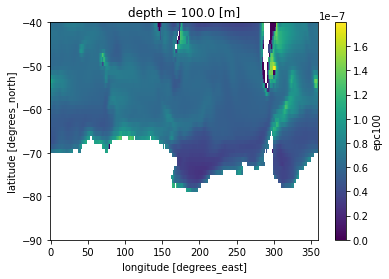

In [12]:
nc = xarray.open_dataset("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))
nc[variable].plot()

In [13]:
files=glob.glob("Data/{}_*_{}_20yr_whole.nc".format(variable, experiment))
files

['Data/epc100_CMCC-ESM2_ssp585_20yr_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_20yr_whole.nc']

In [14]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                              variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                     
Data/epc100_CMCC-ESM2_ssp585_20yr_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_20yr_whole.nc   epc100   None    18000        1      None  None       F32

In [15]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))

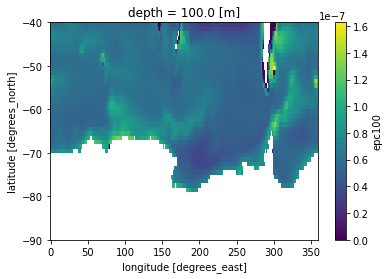

In [16]:
nc = xarray.open_dataset("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))
nc[variable].plot()

### Seasonal percentage difference

In [19]:
files=glob.glob("Data/{}_*_{}_percentage_summer_whole.nc".format(variable, experiment))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_summer_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_summer_whole.nc']

In [20]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                           variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                                  
Data/epc100_CMCC-ESM2_ssp585_percentage_summer_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_summer_whole.nc   epc100   None    18000        1      None  None       F32

In [21]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment))

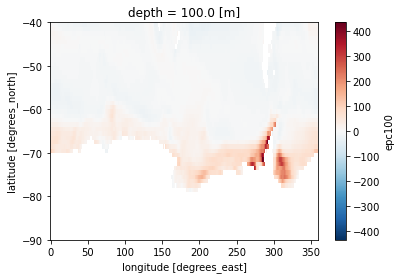

In [22]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment))
nc[variable].plot()

In [23]:
files=glob.glob("Data/{}_*_{}_percentage_winter_whole.nc".format(variable, experiment))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_winter_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_winter_whole.nc']

In [24]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                           variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                                  
Data/epc100_CMCC-ESM2_ssp585_percentage_winter_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_winter_whole.nc   epc100   None    18000        1      None  None       F32

In [25]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment))

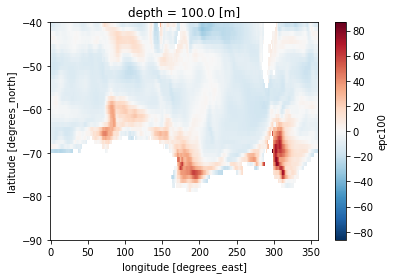

In [26]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment))
nc[variable].plot()

### Timeseries

In [27]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/CMCC-ESM2_epc100_whole.csv', 'csv/IPSL-CM6A-LR_epc100_whole.csv']

In [28]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

     Year        Annual        Summer        Winter         Model
0    2015  7.032623e-08  8.445667e-08  5.451987e-08     CMCC-ESM2
1    2016  7.180962e-08  8.593315e-08  5.527798e-08     CMCC-ESM2
2    2017  7.189691e-08  8.731174e-08  5.503840e-08     CMCC-ESM2
3    2018  6.816416e-08  8.369094e-08  5.197991e-08     CMCC-ESM2
4    2019  6.906072e-08  8.617058e-08  5.062408e-08     CMCC-ESM2
..    ...           ...           ...           ...           ...
167  2096  4.959149e-08  1.142976e-07  8.368434e-09  IPSL-CM6A-LR
168  2097  4.952953e-08  1.134029e-07  8.313781e-09  IPSL-CM6A-LR
169  2098  4.968596e-08  1.126674e-07  8.627818e-09  IPSL-CM6A-LR
170  2099  4.862315e-08  1.095399e-07  8.372303e-09  IPSL-CM6A-LR
171  2100  5.019859e-08  1.133375e-07  8.377878e-09  IPSL-CM6A-LR

[172 rows x 5 columns]


In [29]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)